In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plfrom 
from mplsoccer.pitch import Pitch
import seaborn as sns

In [283]:
df = pd.read_csv('bcnvalaves.csv')

In [294]:
riqui = 372827
barca = 65
r_data = df[df["playerId"]==riqui]
r_data

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/13/type/displayName,blockedX,blockedY,satisfiedEventsTypes/14,qualifiers/13/value,qualifiers/14/type/value,qualifiers/14/type/displayName,qualifiers/14/value,isGoal,satisfiedEventsTypes/15
7,2200971995,8,0,14.0,65,39.3,61.2,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2200972039,12,0,28.0,65,51.9,73.3,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2200972135,23,0,54.0,65,40.7,68.4,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2200972295,38,1,44.0,65,68.7,60.0,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2200972317,41,1,54.0,65,72.2,70.2,1,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2201014573,1031,89,59.0,65,56.0,100.0,91,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1556,2201014715,1040,90,25.0,65,39.3,91.7,92,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1558,2201014725,1042,90,28.0,65,41.8,91.5,92,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1560,2201014749,1044,90,31.0,65,39.4,72.9,92,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
xstart = []
ystart = []
xend = []
yend = []
names = ['x','y']
for index, row in r_data.iterrows():
    if r_data['type/displayName'][index]=='Pass':
        xstart.append(row['x'])
        ystart.append(row['y'])
        #print(row['x'], row['y'])
    
df = pd.DataFrame(data=[xstart,ystart],index=names)
df = df.T

In [308]:
df

,x,y
0,39.3,61.2
1,51.9,73.3
2,40.7,68.4
3,68.7,60.0
4,64.0,85.1
...,...,...
65,56.0,100.0
66,39.3,91.7
67,41.8,91.5
68,39.4,72.9


(0, 100)

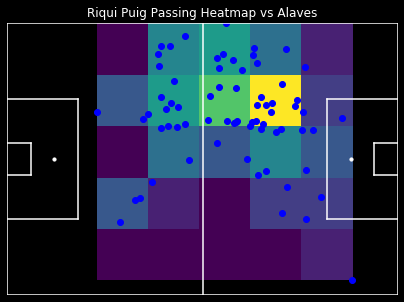

In [341]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

plt.hist2d(xstart,ystart,bins=5)
#sns.kdeplot(xstart,ystart,shade=True,color='red')
#np.histogram2d(xstart,ystart)

#create basic lines
plt.plot([0,0],[0,100],color='white')
plt.plot([0,100],[0,0],color='white')
plt.plot([100,0],[100,100],color='white')
plt.plot([100,100],[0,100],color='white')
plt.plot([50,50],[0,100],color='white')
#right side box
#inner
plt.plot([94,94],[56,44],color='white')
plt.plot([94,100],[56,56],color='white')
plt.plot([94,100],[44,44],color='white')
plt.scatter(88,50,color='white',s=10)

#outer
plt.plot([82,82],[72,28],color='white')
plt.plot([82,100],[72,72],color='white')
plt.plot([82,100],[28,28],color='white')

#left side box
#inner
plt.plot([0,6],[56,56],color='white')
plt.plot([0,6],[44,44],color='white')
plt.plot([6,6],[56,44],color='white')
plt.scatter(12,50,color='white',s=10)

#Outer
plt.plot([18,18],[72,28],color='white')
plt.plot([0,18],[72,72],color='white')
plt.plot([0,18],[28,28],color='white')

for x in range(len(df['x'])):
    plt.scatter(df['x'][x],df['y'][x],color='blue')
    #plt.annotate([df['x'][x],df['y'][x]],'72.5,60.8')
    
#plt.scatter(92.5,44.5,color='red')


plt.title('Riqui Puig Passing Heatmap vs Alaves')
plt.axis('off')
plt.ylim(0, 100) # need this, otherwise kde plot will go outside
plt.xlim(0, 100)

#plt.savefig('riqui2.png')

(array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 1., 0., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 2., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 2., 3., 0.],
        [0., 0., 0., 0., 1., 1., 4., 1., 2., 1.],
        [0., 0., 0., 0., 2., 2., 7., 1., 2., 1.],
        [0., 0., 1., 1., 0., 1., 1., 2., 0., 1.],
        [0., 0., 1., 1., 1., 2., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 array([23.1 , 29.62, 36.14, 42.66, 49.18, 55.7 , 62.22, 68.74, 75.26,
        81.78, 88.3 ]),
 array([  5.5 ,  14.95,  24.4 ,  33.85,  43.3 ,  52.75,  62.2 ,  71.65,
         81.1 ,  90.55, 100.  ]),
 <matplotlib.collections.QuadMesh at 0x7fa92402b790>)

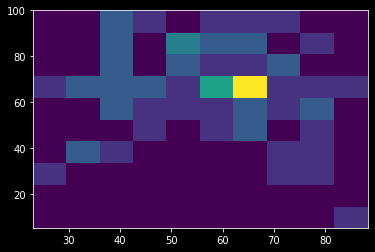

In [333]:
plt.hist2d(xstart,ystart)